In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Options
params = {'text.usetex': True,
          'font.size': 10,
          "font.family": "serif"
          }
plt.rcParams.update(params)


In [14]:
def output_measurement(fin, title, fout = None):
    data = pd.read_csv(fin, delimiter='\t').to_numpy()
    times = data[:, 1] - data[:, 0]
    print(f"Average {np.average(times)}us")

    plt.figure(figsize=(3,3))
    plt.hist(times)
    plt.title(title)
    plt.xlabel("Time ($\mu$s)")
    plt.ylabel("Samples")
    if fout:
        plt.tight_layout()
        plt.savefig(fout)
    plt.show()


Average 23.68us


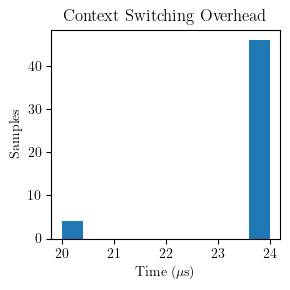

Average 12.72us


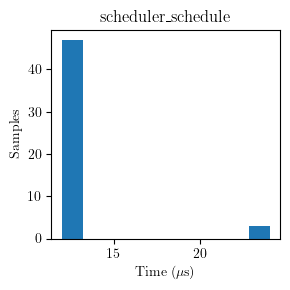

Average 11.04us


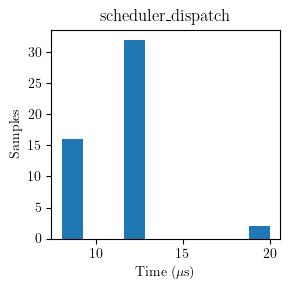

In [25]:
output_measurement('v2/context_switch.csv', 'Context Switching Overhead',
                    'context_switch.pgf')
output_measurement('v2/scheduler_schedule.csv',
                   'scheduler_schedule', 'scheduler_schedule.pgf')
output_measurement('v2/scheduler_dispatch.csv',
                   'scheduler_dispatch', 'scheduler_dispatch.pgf')


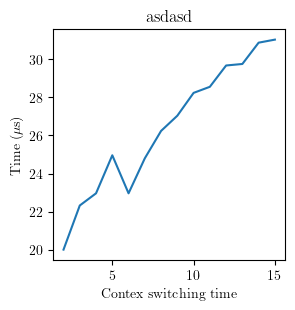

In [34]:
def plot_cswitch(title, amount, fout=None):
    y = np.zeros(amount)
    x = np.array(list(range(2, amount + 2)))
    for i in range(amount):
        data = pd.read_csv(f'v2/cw_{i + 2}.csv', delimiter='\t').to_numpy()
        times = data[:, 1] - data[:, 0]
        y[i] = np.average(times)

    plt.figure(figsize=(3, 3))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("Number of tasks")
    plt.ylabel("Time ($\mu$s)")
    if fout:
        plt.tight_layout()
        plt.savefig(fout)
    plt.show()


plot_cswitch("Contex switching time", 14)
